In [1]:
import numpy as np
import matplotlib.pyplot as plt

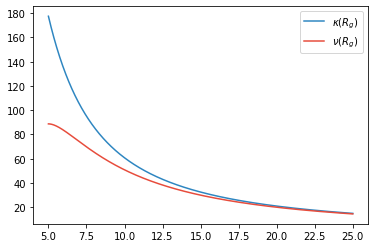

In [2]:
G = 43007.1     # Unidades arbitrarias
M = 8e11/1e10   # UM -> 1e10 Msol
a = 2.5         # Ul -> Kpc disk scale length Rd -> disk scale length Rd
R = np.linspace(5,25,1000)   # Ul -> Kpc Porque según las listas 25 kpc es el radio de los discos tipicamente (Diámetro del disco	23-30 kpc)

κ = G*M*(R**2+4*a**2)/(R**2+a**2)**(5/2) #G*M*(a**2-2*R**2)/(R**2+a**2)**(5/2) + (3)*G*M/(R**2+a**2)**(3/2)
ν = G*M*(R**2-2*a**2)/(R**2+a**2)**(5/2)  #G*M*R**2/ (R**2+a**2)**(3/2) - G*M*R/(R**2+a**2)**(3/2)*R/(R**2+a**2) #  #G*M*(1/(R**2+a**2)**(3/2) - 3*a**2/(R**2+a**2)**(5/2))      #
plt.plot(R,np.sqrt(κ), '-', markersize=5, color = '#2E86C1', label = '$κ(R_g)$')
plt.plot(R,np.sqrt(ν), '-', markersize=5, color = '#E74C3C', label = '$ν(R_g)$')
plt.legend()

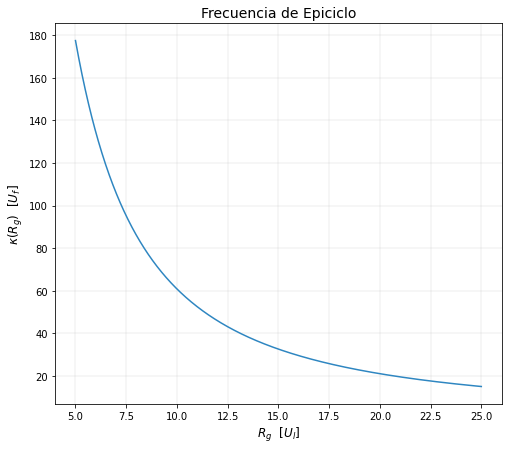

In [3]:
plt.figure(figsize=(8,7))
#plt.plot(R,κ, '-', markersize=5, color = '#6C3483', label = '$κ^2(R_g)$')
plt.plot(R,np.sqrt(κ), '-', markersize=5, color = '#2E86C1', label = '$κ(R_g)$')
plt.xlabel('$R_g ~~[U_l]$',fontsize = 12)
plt.ylabel('$κ(R_g) ~~[U_f]$ ' ,fontsize = 12)
plt.title("Frecuencia de Epiciclo",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

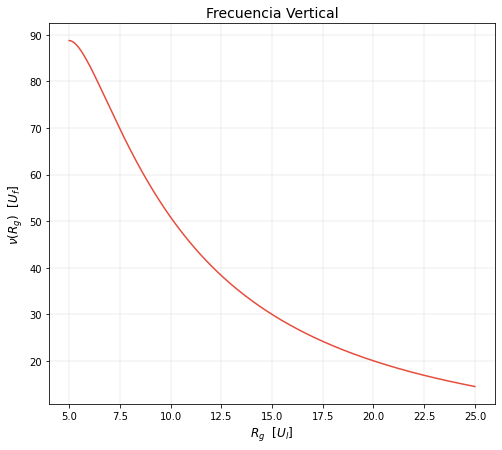

In [4]:
plt.figure(figsize=(8,7))
#plt.plot(R,ν, '-', markersize=5, color = '#6C3483', label = '$ν^2(R_g)$')
plt.plot(R,np.sqrt(ν), '-', markersize=5, color = '#E74C3C', label = '$ν(R_g)$')
plt.xlabel('$R_g~~[U_l]$',fontsize = 12)
plt.ylabel('$ν(R_g)~~[U_f]$ ' ,fontsize = 12)
plt.title("Frecuencia Vertical",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

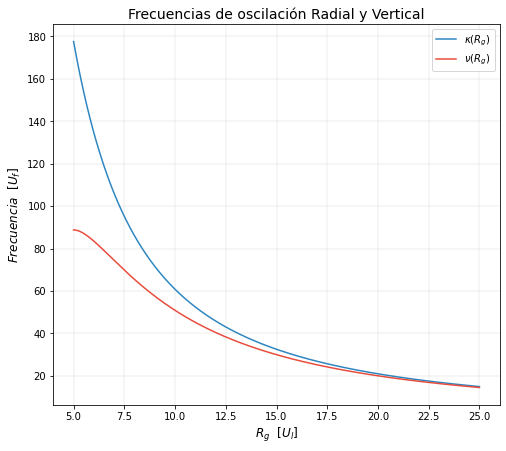

In [5]:
plt.figure(figsize=(8,7))
plt.plot(R,np.sqrt(κ), '-', markersize=5, color = '#2E86C1', label = '$κ(R_g)$')
plt.plot(R,np.sqrt(ν), '-', markersize=5, color = '#E74C3C', label = '$ν(R_g)$')
plt.xlabel('$R_g~~[U_l]$',fontsize = 12)
plt.ylabel('$Frecuencia~~[U_f]$ ' ,fontsize = 12)
plt.title("Frecuencias de oscilación Radial y Vertical",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

In [6]:
R[150]

8.003003003003002

In [7]:
t = np.linspace(0,0.215,100)
x0 = 0.03
z0 = 0.03
R_t = R[150] + x0*np.cos(np.sqrt(κ[150])*t + 0.001)
z_t = z0*np.cos(np.sqrt(ν[150])*t + 0.001)


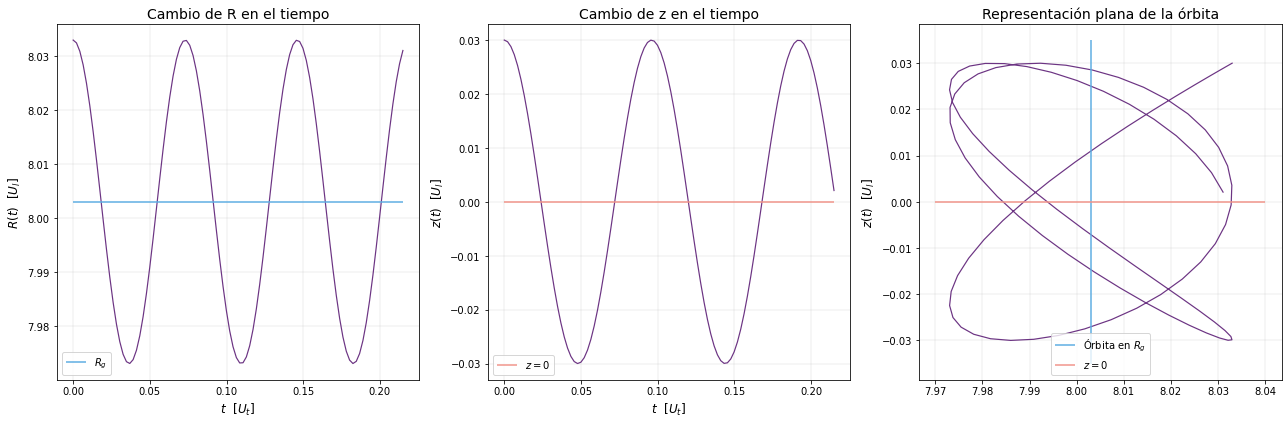

In [8]:
%matplotlib inline
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(t,R_t, '-',linewidth = 1.2, color = '#6C3483')
axs[0].hlines(y=R[150], xmin=0, xmax=0.215, color = '#5DADE2', label = '$R_g$')
axs[0].set_xlabel('$t ~~[U_t]$',fontsize = 12)
axs[0].set_ylabel('$R(t)~~ [U_l]$' ,fontsize = 12)
axs[0].set_title("Cambio de R en el tiempo",fontsize = 14)
axs[0].grid(linestyle='-', linewidth=0.2)
axs[0].legend()


axs[1].plot(t,z_t, '-',linewidth = 1.2, color = '#6C3483')
axs[1].hlines(y=0, xmin=0, xmax=0.215, color = '#F1948A', label = '$z=0$')
axs[1].set_xlabel('$t ~~[U_t]$',fontsize = 12)
axs[1].set_ylabel('$z(t)~~ [U_l]$' ,fontsize = 12)
axs[1].set_title("Cambio de z en el tiempo",fontsize = 14)
axs[1].grid(linestyle='-', linewidth=0.2)
axs[1].legend()


axs[2].plot(R_t,z_t, '-',linewidth = 1.2, color = '#6C3483')
axs[2].vlines(x=R[150], ymin=-0.035, ymax=0.035, color = '#5DADE2', label = 'Órbita en $R_g$')
axs[2].hlines(y=0, xmin=8.04, xmax=7.97, color = '#F1948A', label = '$z=0$')
axs[2].set_ylabel('$R(t)~~ [U_l]$' ,fontsize = 12)
axs[2].set_ylabel('$z(t)~~ [U_l]$' ,fontsize = 12)
axs[2].set_title("Representación plana de la órbita",fontsize = 14)
axs[2].grid(linestyle='-', linewidth=0.2)
axs[2].legend()
fig.tight_layout()

In [9]:
#pip install galpy

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units
from galpy.potential import KuzminDiskPotential
from galpy.potential import MiyamotoNagaiPotential
from galpy.orbit import Orbit

In [11]:
# Constantes
G = 43007.1     # Unidades arbitrarias
M = 8e11        # UM -> 1e10 Msol
a = 2.5         # Ul -> Kpc disk scale length Rd -> disk scale length Rd
#R = np.linspace(0,25,1000)   # Ul -> Kpc Porque según las listas 25 kpc es el radio de los discos tipicamente (Diámetro del disco	23-30 kpc)

# Modelo de potencial
kpp = KuzminDiskPotential(amp=M*units.Msun, a=a*units.kpc, normalize=False)

# Array de distancias
Rs = np.linspace(0, 25, 1000)*units.kpc

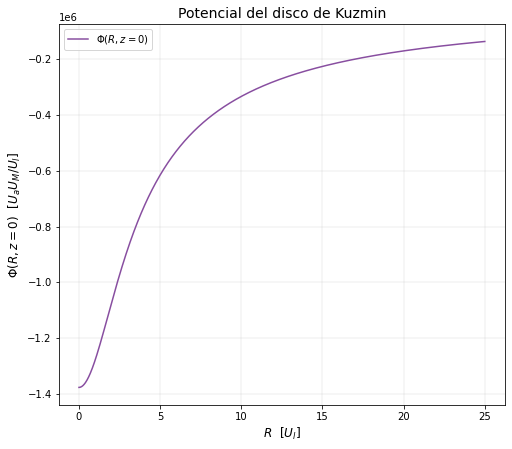

In [12]:
plt.figure(figsize=(8,7))
plt.plot(Rs,kpp(Rs, 0), '-', markersize=5, color = '#884EA0', label = '$Φ(R,z=0)$')
plt.xlabel('$R ~~[U_l]$',fontsize = 12)
plt.ylabel('$Φ(R,z=0) ~~ [U_a U_M / U_l]$ ' ,fontsize = 12)
plt.title("Potencial del disco de Kuzmin",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

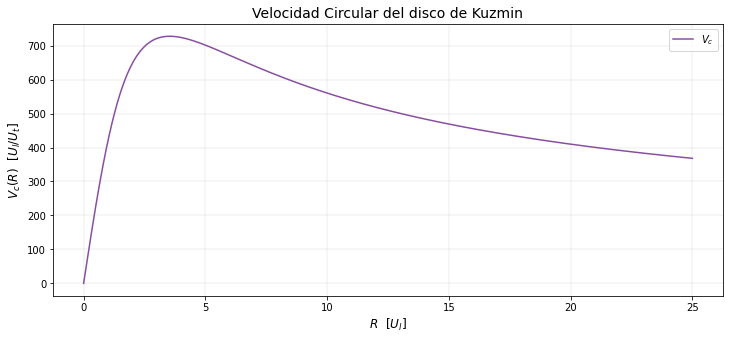

In [13]:
plt.figure(figsize=(12,5))
plt.plot(Rs, kpp.vcirc(Rs), '-', markersize=5, color = '#884EA0', label = '$V_c$')
plt.xlabel('$R~~[U_l]$',fontsize = 12)
plt.ylabel('$V_c(R)~~[U_l/U_t]$ ' ,fontsize = 12)
plt.title("Velocidad Circular del disco de Kuzmin",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

In [14]:
dz = 0.03#Perturbación en z
R = 8 # Radio de prueba
vc = kpp.vcirc(R*units.kpc)
ts = np.linspace(0, 0.215, 1000)*units.Gyr # Array de tiempos
#0.215
# O [R, v_R, v_tan, z, v_z, phi_inicial
o = Orbit([R*units.kpc, 50*units.km/units.s, vc*units.km/units.s, 0*units.kpc, 30*units.km/units.s, 0*units.deg])
#o = Orbit([2.,0,2.25,0.01,0,0],radec=True,ro=8.,vo=220.)
o.integrate(ts,kpp, method='odeint') # Integración de órbita

(-8.656406019827035, 9.467149985364887, -8.74730064537671, 9.462194010284943)

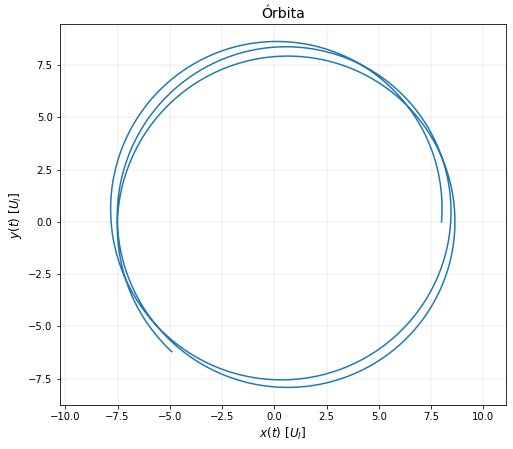

In [15]:
'''ax = plt.figure().gca()
ax.plot(o.x(ts)*units.kpc, o.y(ts)*units.kpc)
ax.grid()
ax.axis('equal')
'''
plt.figure(figsize=(8,7)).gca()
plt.plot(o.x(ts)*units.kpc, o.y(ts)*units.kpc)
plt.xlabel('$x(t) ~ [U_l]$',fontsize = 12)
plt.ylabel('$y(t) ~ [U_l]$ ' ,fontsize = 12)
plt.title("Órbita",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.axis('equal')


<Figure size 576x576 with 0 Axes>

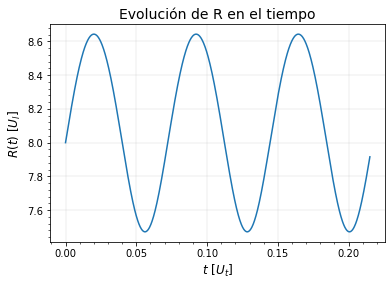

In [16]:
plt.figure(figsize=(8,8))
o.plot(d1='t', d2='R')
plt.xlabel('$t ~[U_t]$',fontsize = 12)
plt.ylabel('$R(t) ~[U_l]$ ' ,fontsize = 12)
plt.title("Evolución de R en el tiempo",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)


<Figure size 576x576 with 0 Axes>

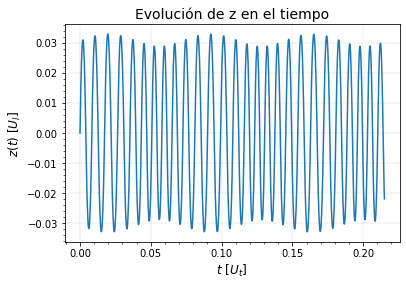

In [17]:
plt.figure(figsize=(8,8))
o.plot(d1='t', d2='z')
plt.xlabel('$t ~[U_t]$',fontsize = 12)
plt.ylabel('$z(t) ~[U_l]$ ' ,fontsize = 12)
plt.title("Evolución de z en el tiempo",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

<Figure size 576x576 with 0 Axes>

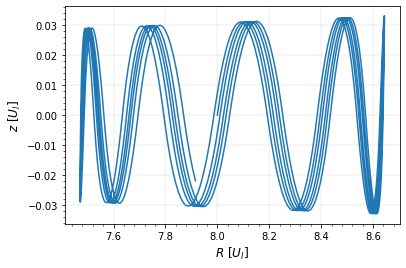

In [18]:
plt.figure(figsize=(8,8))
o.plot(d1='R', d2='z')
plt.xlabel('$R ~[U_l]$',fontsize = 12)
plt.ylabel('$z ~[U_l]$ ' ,fontsize = 12)
plt.title("",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

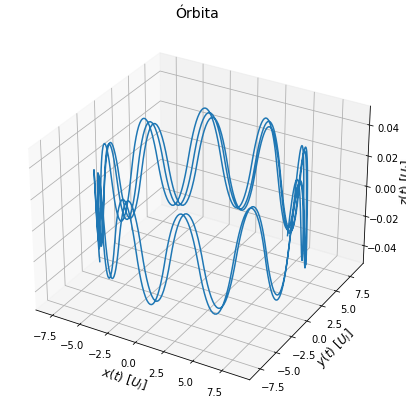

In [37]:
# Perturbaciones en z
%matplotlib inline
#o.plot3d(d1='x', d2='y', d3='z')
fig = plt.figure(figsize=(8,7))
ax = plt.axes(projection='3d')
ax = plt.gca()

ax.plot3D(o.x(ts)*units.kpc, o.y(ts)*units.kpc, o.z(ts)*units.kpc)
ax.set_zlim(-0.05,0.05)
ax.set_xlabel('$x(t) ~[U_l]$',fontsize = 12)
ax.set_ylabel('$y(t) ~[U_l]$ ' ,fontsize = 12)
ax.set_zlabel('$z(t) ~[U_l]$ ' ,fontsize = 12)

ax.set_title("Órbita",fontsize = 14)
ax.grid(linestyle='-', linewidth=0.2)
plt.show()

In [21]:
o.animate3d(staticPlot=True) # remove the ; to display the animation


In [22]:
%matplotlib inline

<Figure size 792x792 with 0 Axes>

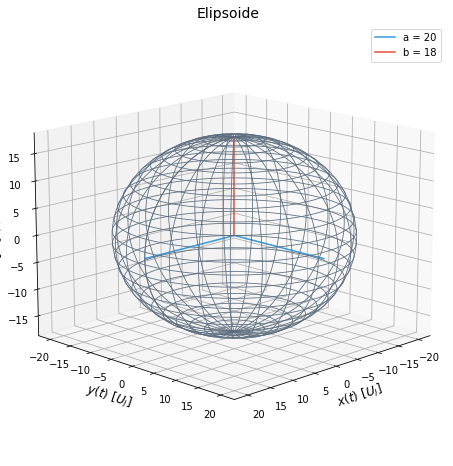

In [23]:
from mpl_toolkits.mplot3d import Axes3D
# we fiddle with the aspect ratio here
# to make the axes line up more tightly
# (adjusted for at the bottom)
stretch= 1.5
fig= plt.figure(figsize=(11,11))
coeffs_sets = [(20,20,18)]# Coefficients in (x/a)**2 + (y/b)**2 + (z/c)**2 = 1
labels= ['oblate','prolate','triaxial']
# Spherical angle grid for parametric ellipsoids
phi= np.linspace(0.,2.*np.pi,101)
theta= np.linspace(0.,np.pi,101)


'''    # Plot as wireframe
    ax.plot_wireframe(x, y, z,rstride=5,cstride=6,lw=1.,color='red')
    maxr= max(rx,ry,rz)
    for axis in 'xy':
        getattr(ax,'set_{}lim'.format(axis))((-maxr/stretch,maxr/stretch))
    getattr(ax,'set_zlim'.format(axis))((-maxr/stretch,maxr/stretch))
    ax.view_init(15+ii*10,20.)
    ax._axis3don = False
    '''
    
for ii,coeffs in enumerate(coeffs_sets):
    # Radii in x,y,z
    rx, ry, rz= coeffs
    # Convert to cartesian coordinates
    x= rx*np.outer(np.cos(phi),np.sin(theta))
    y= ry*np.outer(np.sin(phi),np.sin(theta))
    z= rz*np.outer(np.ones_like(phi),np.cos(theta))
    
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax = plt.gca()
ax.plot_wireframe(x, y, z,rstride=4,cstride=4,lw=0.8,color='#5D6D7E')
xa = np.linspace(0,20,100)
xb = np.linspace(0,18,100)

ax.plot3D(xa,xa*0,xa*0, '-', color = '#3498DB', label = 'a = 20')
ax.plot3D(xa*0,xa,xa*0, '-', color = '#3498DB')
ax.plot3D(xa*0,xa*0,xb, '-', color = '#E74C3C', label = 'b = 18')

ax.set_xlabel('$x(t) ~[U_l]$',fontsize = 12)
ax.set_ylabel('$y(t) ~[U_l]$ ' ,fontsize = 12)
ax.set_zlabel('$z(t) ~[U_l]$ ' ,fontsize = 12)
ax.set_title("Elipsoide",fontsize = 14)
ax.grid(linestyle='-', linewidth=0.2)
ax.view_init(15, 45) 
plt.legend()
plt.show()

(-22.0, 22.0, -22.0, 22.0)

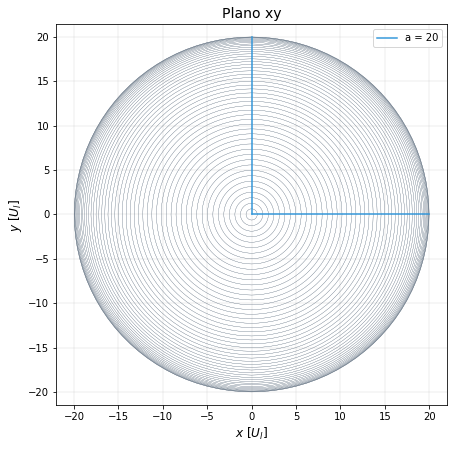

In [24]:
plt.figure(figsize=(7,7))
plt.xlabel('$x ~[U_l]$',fontsize = 12)
plt.ylabel('$y ~[U_l]$ ' ,fontsize = 12)
plt.title("Plano xy",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.plot(x, y,lw=0.2, color = '#5D6D7E')
plt.plot(xa,xa*0, '-', color = '#3498DB', label = 'a = 20')
plt.plot(xa*0,xa, '-', color = '#3498DB')
plt.legend()
plt.axis('equal')

(-22.0, 22.0, -19.8, 19.8)

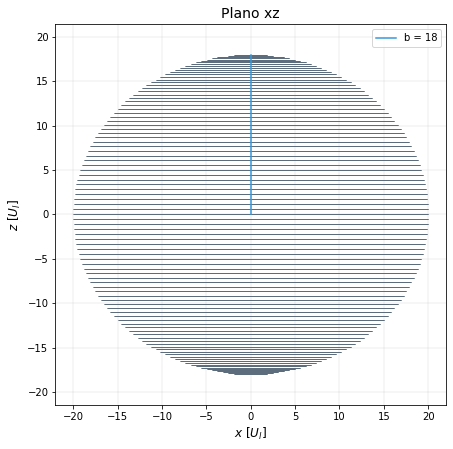

In [25]:
plt.figure(figsize=(7,7))
plt.xlabel('$x ~[U_l]$',fontsize = 12)
plt.ylabel('$z ~[U_l]$ ' ,fontsize = 12)
plt.title("Plano xz",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.plot(x, z,lw=0.5, color = '#5D6D7E')
plt.plot(xb*0,xb, '-', color = '#3498DB', label = 'b = 18')
plt.legend()
plt.axis('equal')

In [26]:
# Constantes
G = 43007.1     # Unidades arbitrarias
Mh = 2e12        # UM -> 1e10 Msol
ah = 20 #15         # Ul -> Kpc disk scale length Rd -> disk scale length Rd
bh = 18 #13.5
#R = np.linspace(0,25,1000)   # Ul -> Kpc Porque según las listas 25 kpc es el radio de los discos tipicamente (Diámetro del disco	23-30 kpc)

# Modelo de potencial
mp= MiyamotoNagaiPotential(amp=Mh*units.Msun,a=ah*units.kpc,b=bh*units.kpc, normalize=True)

# Array de distancias
Rh = np.linspace(0, 200, 1000)*units.kpc


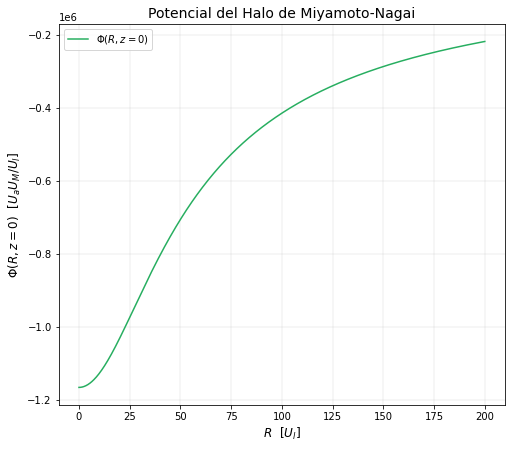

In [27]:
plt.figure(figsize=(8,7))
plt.plot(Rh,mp(Rh, 0), '-', markersize=5, color = '#27AE60', label = '$Φ(R,z=0)$')
plt.xlabel('$R ~~[U_l]$',fontsize = 12)
plt.ylabel('$Φ(R,z=0) ~~ [U_a U_M / U_l]$ ' ,fontsize = 12)
plt.title("Potencial del Halo de Miyamoto-Nagai",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

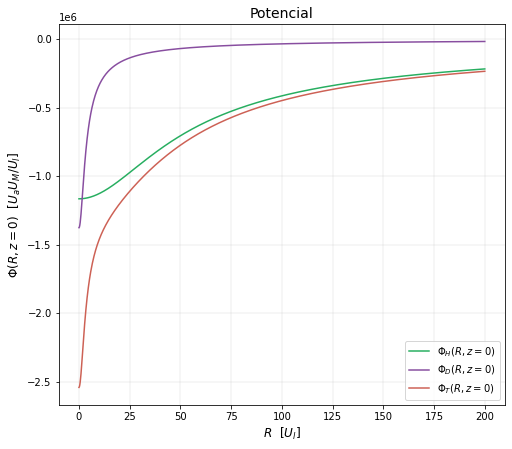

In [28]:
plt.figure(figsize=(8,7))
plt.plot(Rh,mp(Rh, 0), '-', markersize=5, color = '#27AE60', label = '$Φ_H(R,z=0)$')
plt.plot(Rh,kpp(Rh, 0), '-', markersize=5, color = '#884EA0', label = '$Φ_D(R,z=0)$')
plt.plot(Rh,mp(Rh, 0) + kpp(Rh, 0), '-', markersize=5, color = '#CD6155', label = '$Φ_T(R,z=0)$')

plt.xlabel('$R ~~[U_l]$',fontsize = 12)
plt.ylabel('$Φ(R,z=0) ~~ [U_a U_M / U_l]$ ' ,fontsize = 12)
plt.title("Potencial",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

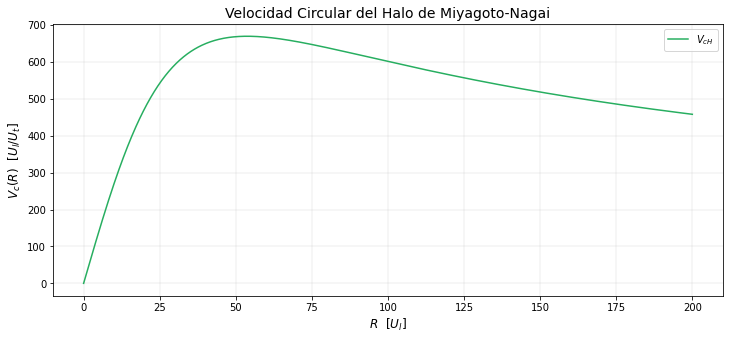

In [29]:
plt.figure(figsize=(12,5))
plt.plot(Rh, mp.vcirc(Rh), '-', markersize=5, color = '#27AE60', label = '$V_{cH}$')
plt.xlabel('$R~~[U_l]$',fontsize = 12)
plt.ylabel('$V_c(R)~~[U_l/U_t]$ ' ,fontsize = 12)
plt.title("Velocidad Circular del Halo de Miyagoto-Nagai",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

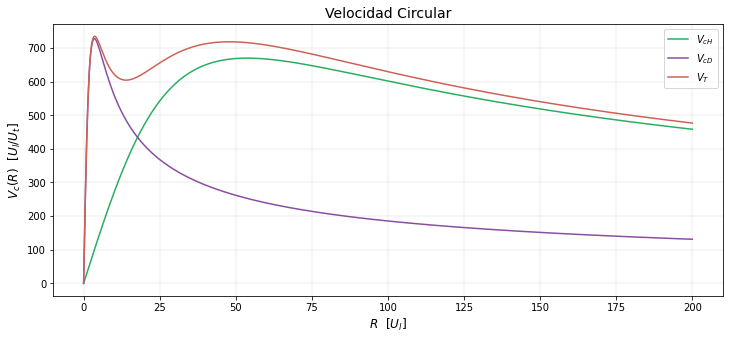

In [30]:
plt.figure(figsize=(12,5))
plt.plot(Rh, mp.vcirc(Rh), '-', markersize=5, color = '#27AE60', label = '$V_{cH}$')
plt.plot(Rh, kpp.vcirc(Rh), '-', markersize=5, color = '#884EA0', label = '$V_{cD}$')
plt.plot(Rh,np.sqrt(mp.vcirc(Rh)**2+ kpp.vcirc(Rh)**2), '-', markersize=5, color = '#CD6155', label = '$V_T$')

plt.xlabel('$R~~[U_l]$',fontsize = 12)
plt.ylabel('$V_c(R)~~[U_l/U_t]$ ' ,fontsize = 12)
plt.title("Velocidad Circular",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.legend()

In [31]:
mp= MiyamotoNagaiPotential(amp=5*10**10*units.Msun,a=3.*units.kpc,b=300.*units.pc)


In [32]:
dz = 0.03#Perturbación en z
R = 8 # Radio de prueba
vc = kpp.vcirc(R*units.kpc)
ts = np.linspace(0, 0.215, 1000)*units.Gyr # Array de tiempos
#0.215
# O [R, v_R, v_tan, z, v_z, phi_inicial
o1 = Orbit([R*units.kpc, 50*units.km/units.s, vc*units.km/units.s, 0*units.kpc, 30*units.km/units.s, 0*units.deg])
#o = Orbit([2.,0,2.25,0.01,0,0],radec=True,ro=8.,vo=220.)
o1.integrate(ts,kpp+mp, method='odeint') # Integración de órbita

(-8.251589962635078, 9.12449653947082, -9.155522328999973, 8.99659160910804)

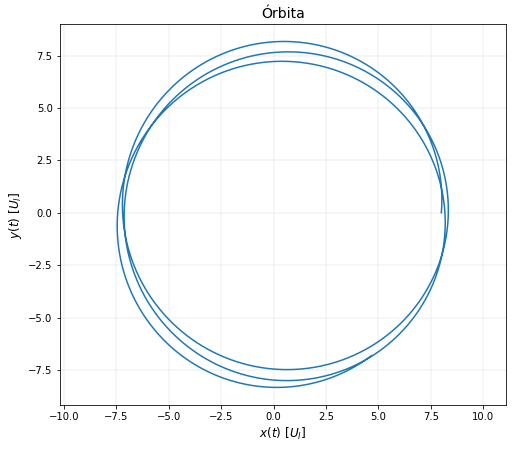

In [33]:
plt.figure(figsize=(8,7)).gca()
plt.plot(o1.x(ts)*units.kpc, o1.y(ts)*units.kpc)
plt.xlabel('$x(t) ~ [U_l]$',fontsize = 12)
plt.ylabel('$y(t) ~ [U_l]$ ' ,fontsize = 12)
plt.title("Órbita",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)
plt.axis('equal')


<Figure size 576x576 with 0 Axes>

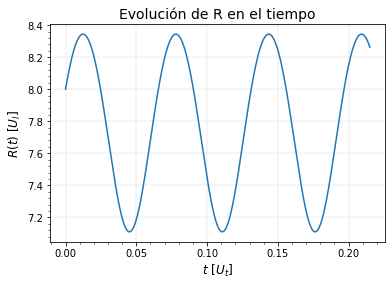

In [34]:
plt.figure(figsize=(8,8))
o1.plot(d1='t', d2='R')
plt.xlabel('$t ~[U_t]$',fontsize = 12)
plt.ylabel('$R(t) ~[U_l]$ ' ,fontsize = 12)
plt.title("Evolución de R en el tiempo",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)


<Figure size 576x576 with 0 Axes>

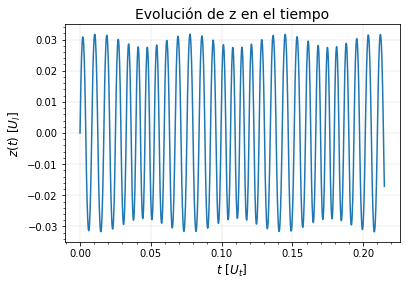

In [35]:
plt.figure(figsize=(8,8))
o1.plot(d1='t', d2='z')
plt.xlabel('$t ~[U_t]$',fontsize = 12)
plt.ylabel('$z(t) ~[U_l]$ ' ,fontsize = 12)
plt.title("Evolución de z en el tiempo",fontsize = 14)
plt.grid(linestyle='-', linewidth=0.2)

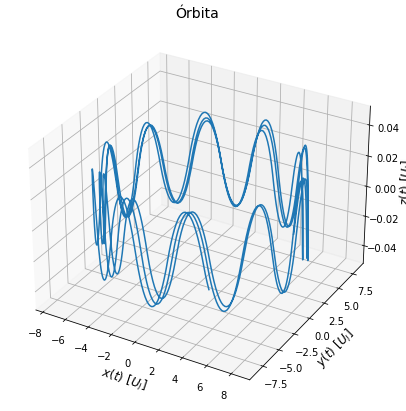

In [36]:
fig = plt.figure(figsize=(8,7))
ax = plt.axes(projection='3d')
ax = plt.gca()

ax.plot3D(o1.x(ts)*units.kpc, o1.y(ts)*units.kpc, o1.z(ts)*units.kpc)
ax.set_zlim(-0.05,0.05)
ax.set_xlabel('$x(t) ~[U_l]$',fontsize = 12)
ax.set_ylabel('$y(t) ~[U_l]$ ' ,fontsize = 12)
ax.set_zlabel('$z(t) ~[U_l]$ ' ,fontsize = 12)

ax.set_title("Órbita",fontsize = 14)
ax.grid(linestyle='-', linewidth=0.2)
plt.show()